#Cài mô hình

In [2]:
#Cài Yolo phiên bản thứ 12
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 107.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
#Xem vị trí lưu mô hình
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
#Lấy một bức ảnh từ roboflow, mục đích để chạy thử mô hình
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2025-05-15 20:28:17--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.001s  

2025-05-15 20:28:17 (79.5 MB/s) - ‘dog.jpeg’ saved [106055/106055]



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


100%|██████████| 51.4M/51.4M [00:01<00:00, 38.6MB/s]


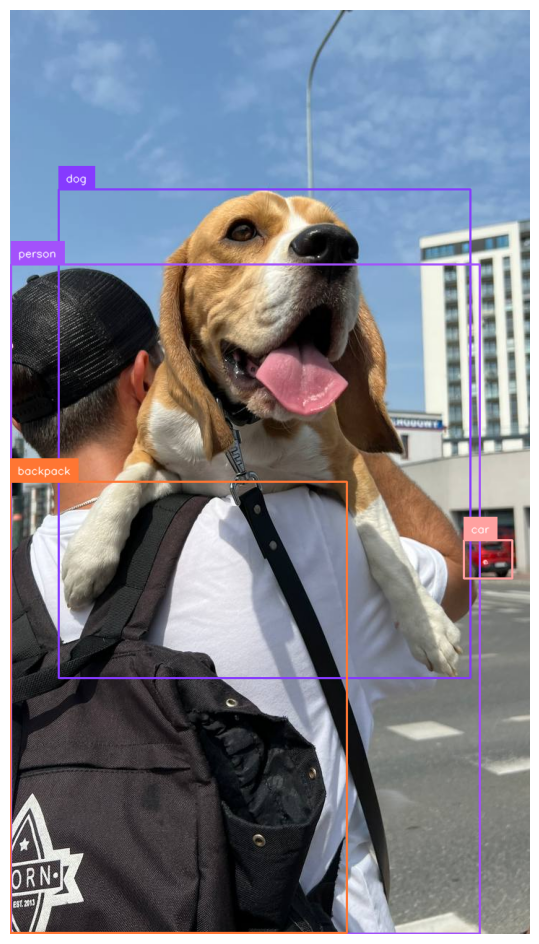

In [6]:
#Chạy thử mô hình
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12l.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

#Tải dữ liệu

Lưu ý: Dữ liệu đã được tiền xử lý trên Roboflow


In [7]:
#Kết nối với tài khoản trên Roboflow qua secret key
import os
from google.colab import userdata

os.environ["duy-2lsuv"] = userdata.get("duy-2lsuv")

In [8]:
#Tải và giải nén bộ dữ liệu từ RoboFlow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MuUUCWIzarkJsx3Ha7XN")
project = rf.workspace("duy-2lsuv").project("vehicle-bhkcz-7qrk2")
version = project.version(3)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-3 in yolov12:: 100%|██████████| 10002/10002 [00:01<00:00, 5950.07it/s]


In [9]:
#Vị trí lưu bộ dữ liệu
print(dataset.location)

/content/Vehicle-3


In [10]:
#Biến đổi dữ liệu để phù hợp với mô hình
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [11]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 6
names: ['bus', 'car', 'motorbike', 'threewheel', 'truck', 'van']

roboflow:
  workspace: duy-2lsuv
test: ../test/images
train: ../train/images
val: ../valid/images


#Huấn luyện mô hình

In [13]:
model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=30)

New https://pypi.org/project/ultralytics/8.3.135 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Vehicle-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

100%|██████████| 755k/755k [00:00<00:00, 84.6MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 313MB/s]


AMP: checks passed ✅


train: Scanning /content/Vehicle-3/train/labels... 4114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4114/4114 [00:01<00:00, 2337.74it/s]


train: New cache created: /content/Vehicle-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 5272. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Vehicle-3/valid/labels... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1321.76it/s]

val: New cache created: /content/Vehicle-3/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.81G      3.009      4.184      3.978          6        640: 100%|██████████| 258/258 [02:25<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.96it/s]

                   all        587        746    0.00322      0.683     0.0148    0.00315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.82G      2.297      3.662      2.939          5        640: 100%|██████████| 258/258 [02:20<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.36it/s]


                   all        587        746     0.0428      0.162     0.0287    0.00841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.91G      2.053       3.28      2.612          9        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.21it/s]


                   all        587        746     0.0785      0.122     0.0492     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.78G      1.917      2.997      2.406          6        640: 100%|██████████| 258/258 [02:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]


                   all        587        746      0.132      0.318     0.0981     0.0396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.92G      1.742      2.757      2.246          6        640: 100%|██████████| 258/258 [02:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.44it/s]


                   all        587        746      0.316      0.345      0.168     0.0814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.95G      1.616      2.566      2.113          6        640: 100%|██████████| 258/258 [02:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.47it/s]


                   all        587        746      0.216      0.412      0.205      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.76G      1.544      2.463      2.027          6        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.37it/s]


                   all        587        746      0.217       0.46      0.294      0.166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.93G      1.482      2.331      1.962          7        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.62it/s]


                   all        587        746       0.29      0.498       0.37      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.93G      1.433      2.218      1.906          6        640: 100%|██████████| 258/258 [02:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.46it/s]


                   all        587        746      0.361      0.469      0.387      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.96G      1.386      2.137      1.862          8        640: 100%|██████████| 258/258 [02:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.39it/s]


                   all        587        746      0.414      0.526      0.449       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.93G      1.337       2.03      1.821          5        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.59it/s]


                   all        587        746      0.394      0.581      0.474      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.94G      1.294      1.964      1.771          8        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.54it/s]


                   all        587        746      0.428      0.603      0.539      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.76G      1.265      1.894      1.742          5        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:08<00:00,  2.37it/s]


                   all        587        746      0.485      0.624      0.591      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.95G      1.236      1.855      1.715          3        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]


                   all        587        746      0.506       0.63      0.599      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.93G      1.201      1.786      1.687          5        640: 100%|██████████| 258/258 [02:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]


                   all        587        746      0.551      0.597      0.631      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.95G      1.198      1.751      1.673          7        640: 100%|██████████| 258/258 [02:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.42it/s]

                   all        587        746      0.591      0.659      0.657       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.92G      1.181      1.713      1.657          3        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.45it/s]


                   all        587        746      0.606      0.604       0.65      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.94G      1.139      1.662      1.616          3        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]


                   all        587        746       0.63      0.645      0.689      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.75G      1.128      1.639       1.61          6        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.40it/s]


                   all        587        746      0.686      0.648      0.724      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.95G       1.11      1.623      1.597          9        640: 100%|██████████| 258/258 [02:17<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.60it/s]


                   all        587        746      0.604      0.656      0.677      0.501
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.93G     0.9759      1.371      1.643          3        640: 100%|██████████| 258/258 [02:18<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.50it/s]


                   all        587        746      0.691      0.657      0.739      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.95G     0.9269       1.29       1.59          2        640: 100%|██████████| 258/258 [02:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.38it/s]


                   all        587        746      0.726      0.684      0.766       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.92G     0.8886      1.217      1.551          2        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]


                   all        587        746      0.743      0.695       0.78      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.77G     0.8642       1.18      1.523          2        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.41it/s]


                   all        587        746      0.713       0.72      0.791      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.76G     0.8498      1.144      1.503          2        640: 100%|██████████| 258/258 [02:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.49it/s]

                   all        587        746      0.792       0.74      0.829      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.78G     0.8289        1.1      1.484          3        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.61it/s]

                   all        587        746      0.786      0.771       0.84      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.76G     0.8152      1.088      1.468          5        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]

                   all        587        746      0.816      0.748      0.842      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.95G     0.7989       1.05      1.449          6        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.48it/s]

                   all        587        746      0.801      0.753      0.838      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.93G     0.7841      1.024      1.433          2        640: 100%|██████████| 258/258 [02:17<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.57it/s]


                   all        587        746      0.821      0.765      0.853      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.93G     0.7768      1.006      1.433          2        640: 100%|██████████| 258/258 [02:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.43it/s]


                   all        587        746      0.809      0.787      0.854      0.678

30 epochs completed in 1.231 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 18.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,076,530 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.92it/s]


                   all        587        746      0.805      0.788      0.854      0.679
                   bus         94        106      0.729      0.877      0.911      0.792
                   car        113        120      0.836      0.806      0.837      0.771
             motorbike        116        165      0.861      0.673      0.809      0.472
            threewheel        101        140      0.857      0.812       0.89      0.673
                 truck         90        101      0.732      0.762      0.793      0.561
                   van        103        114      0.814      0.798      0.884      0.803
Speed: 0.2ms preprocess, 8.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2


#Đánh giá mô hình

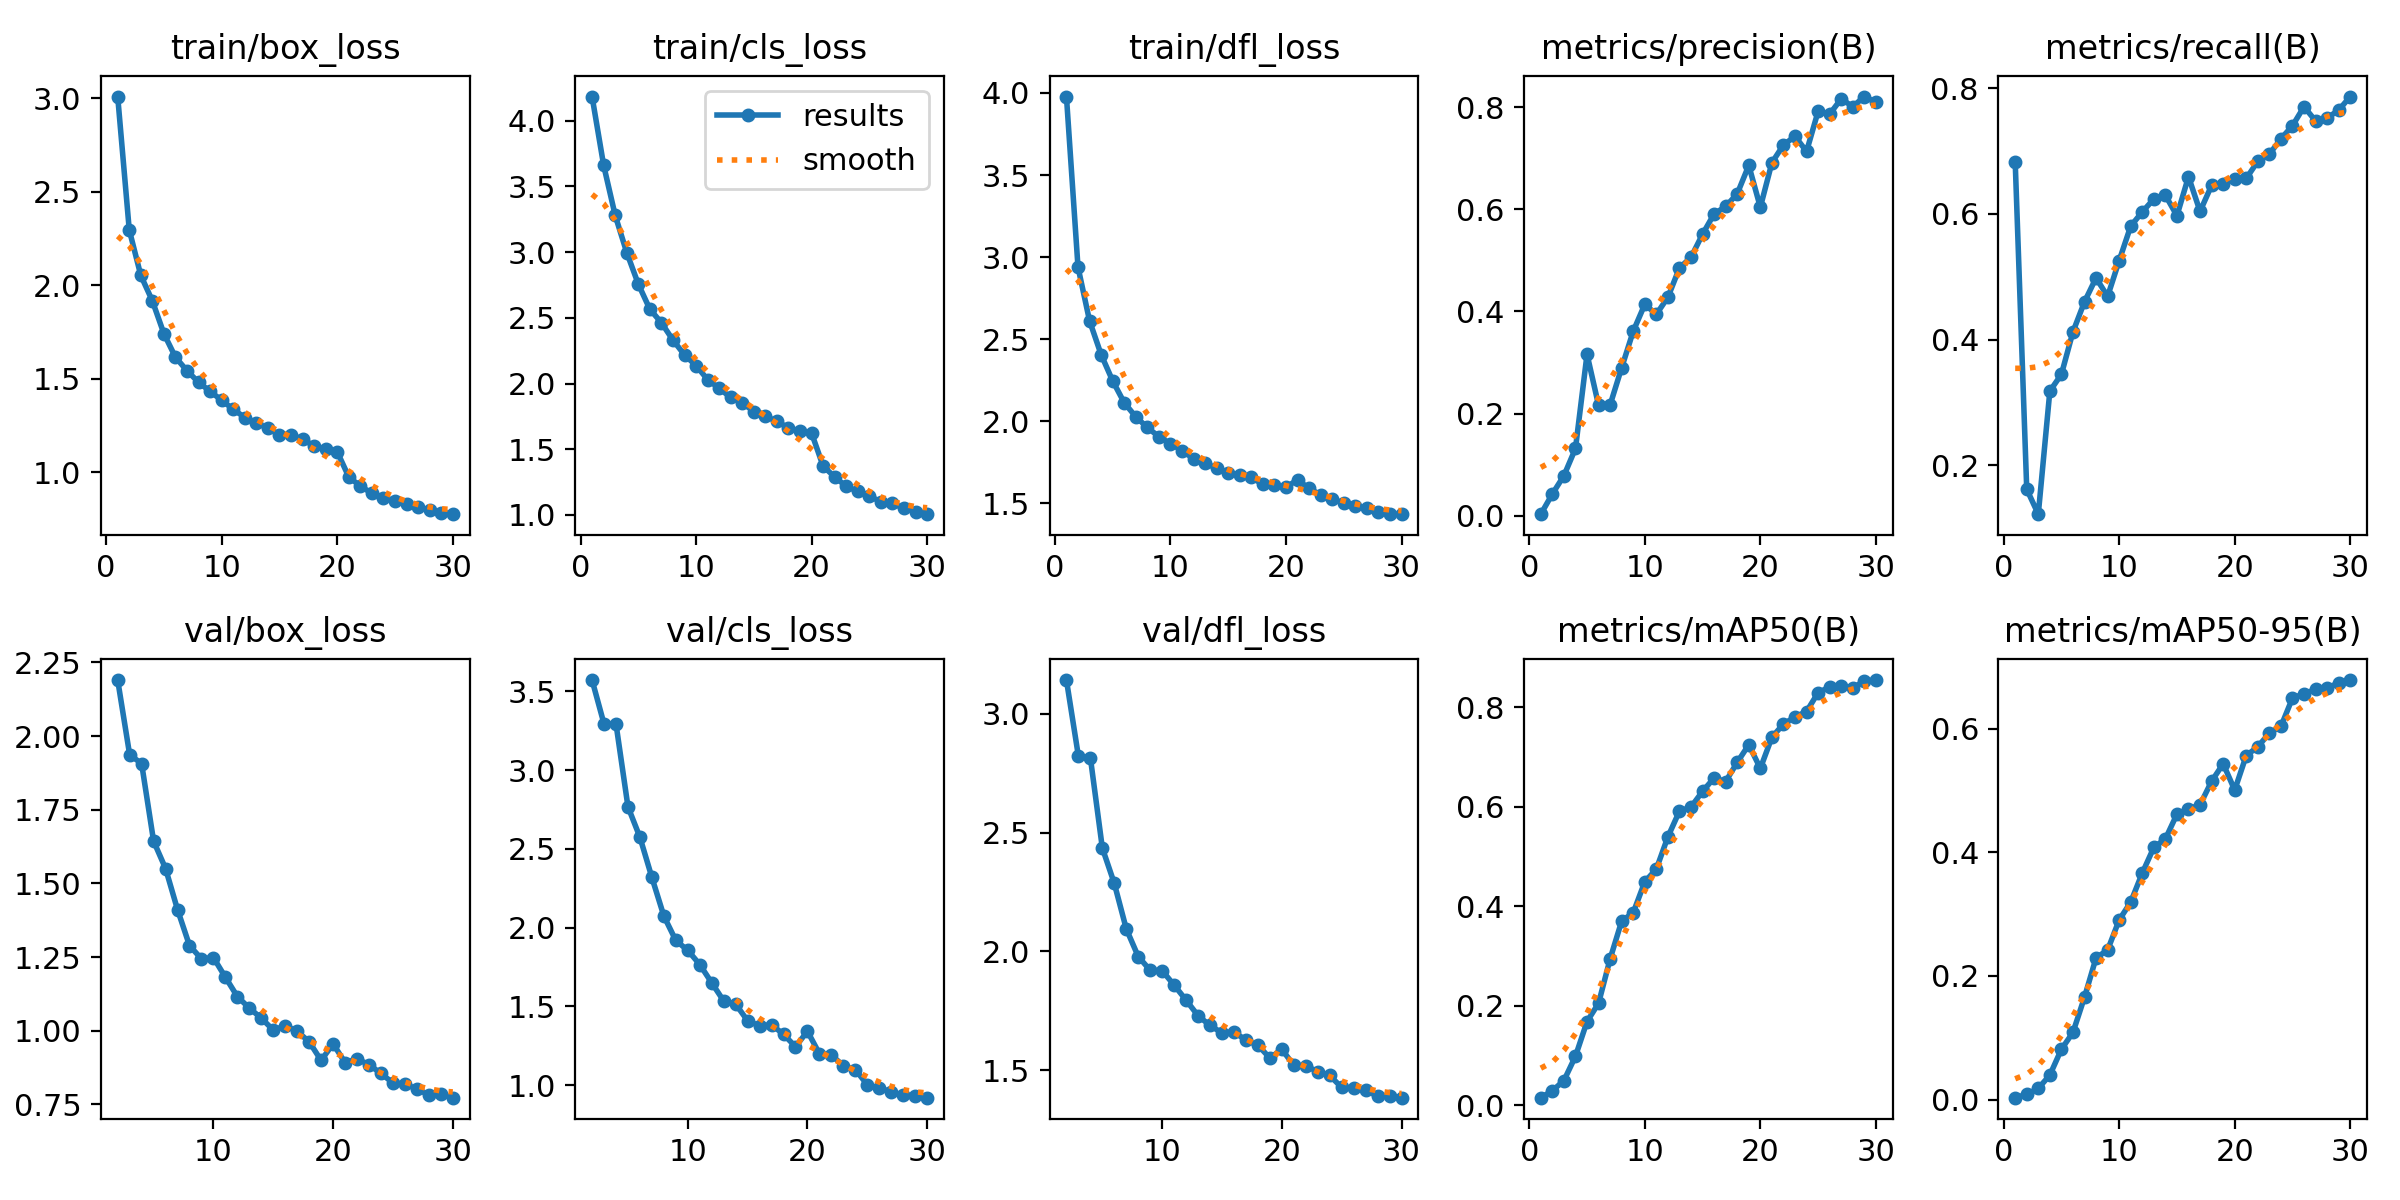

In [20]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

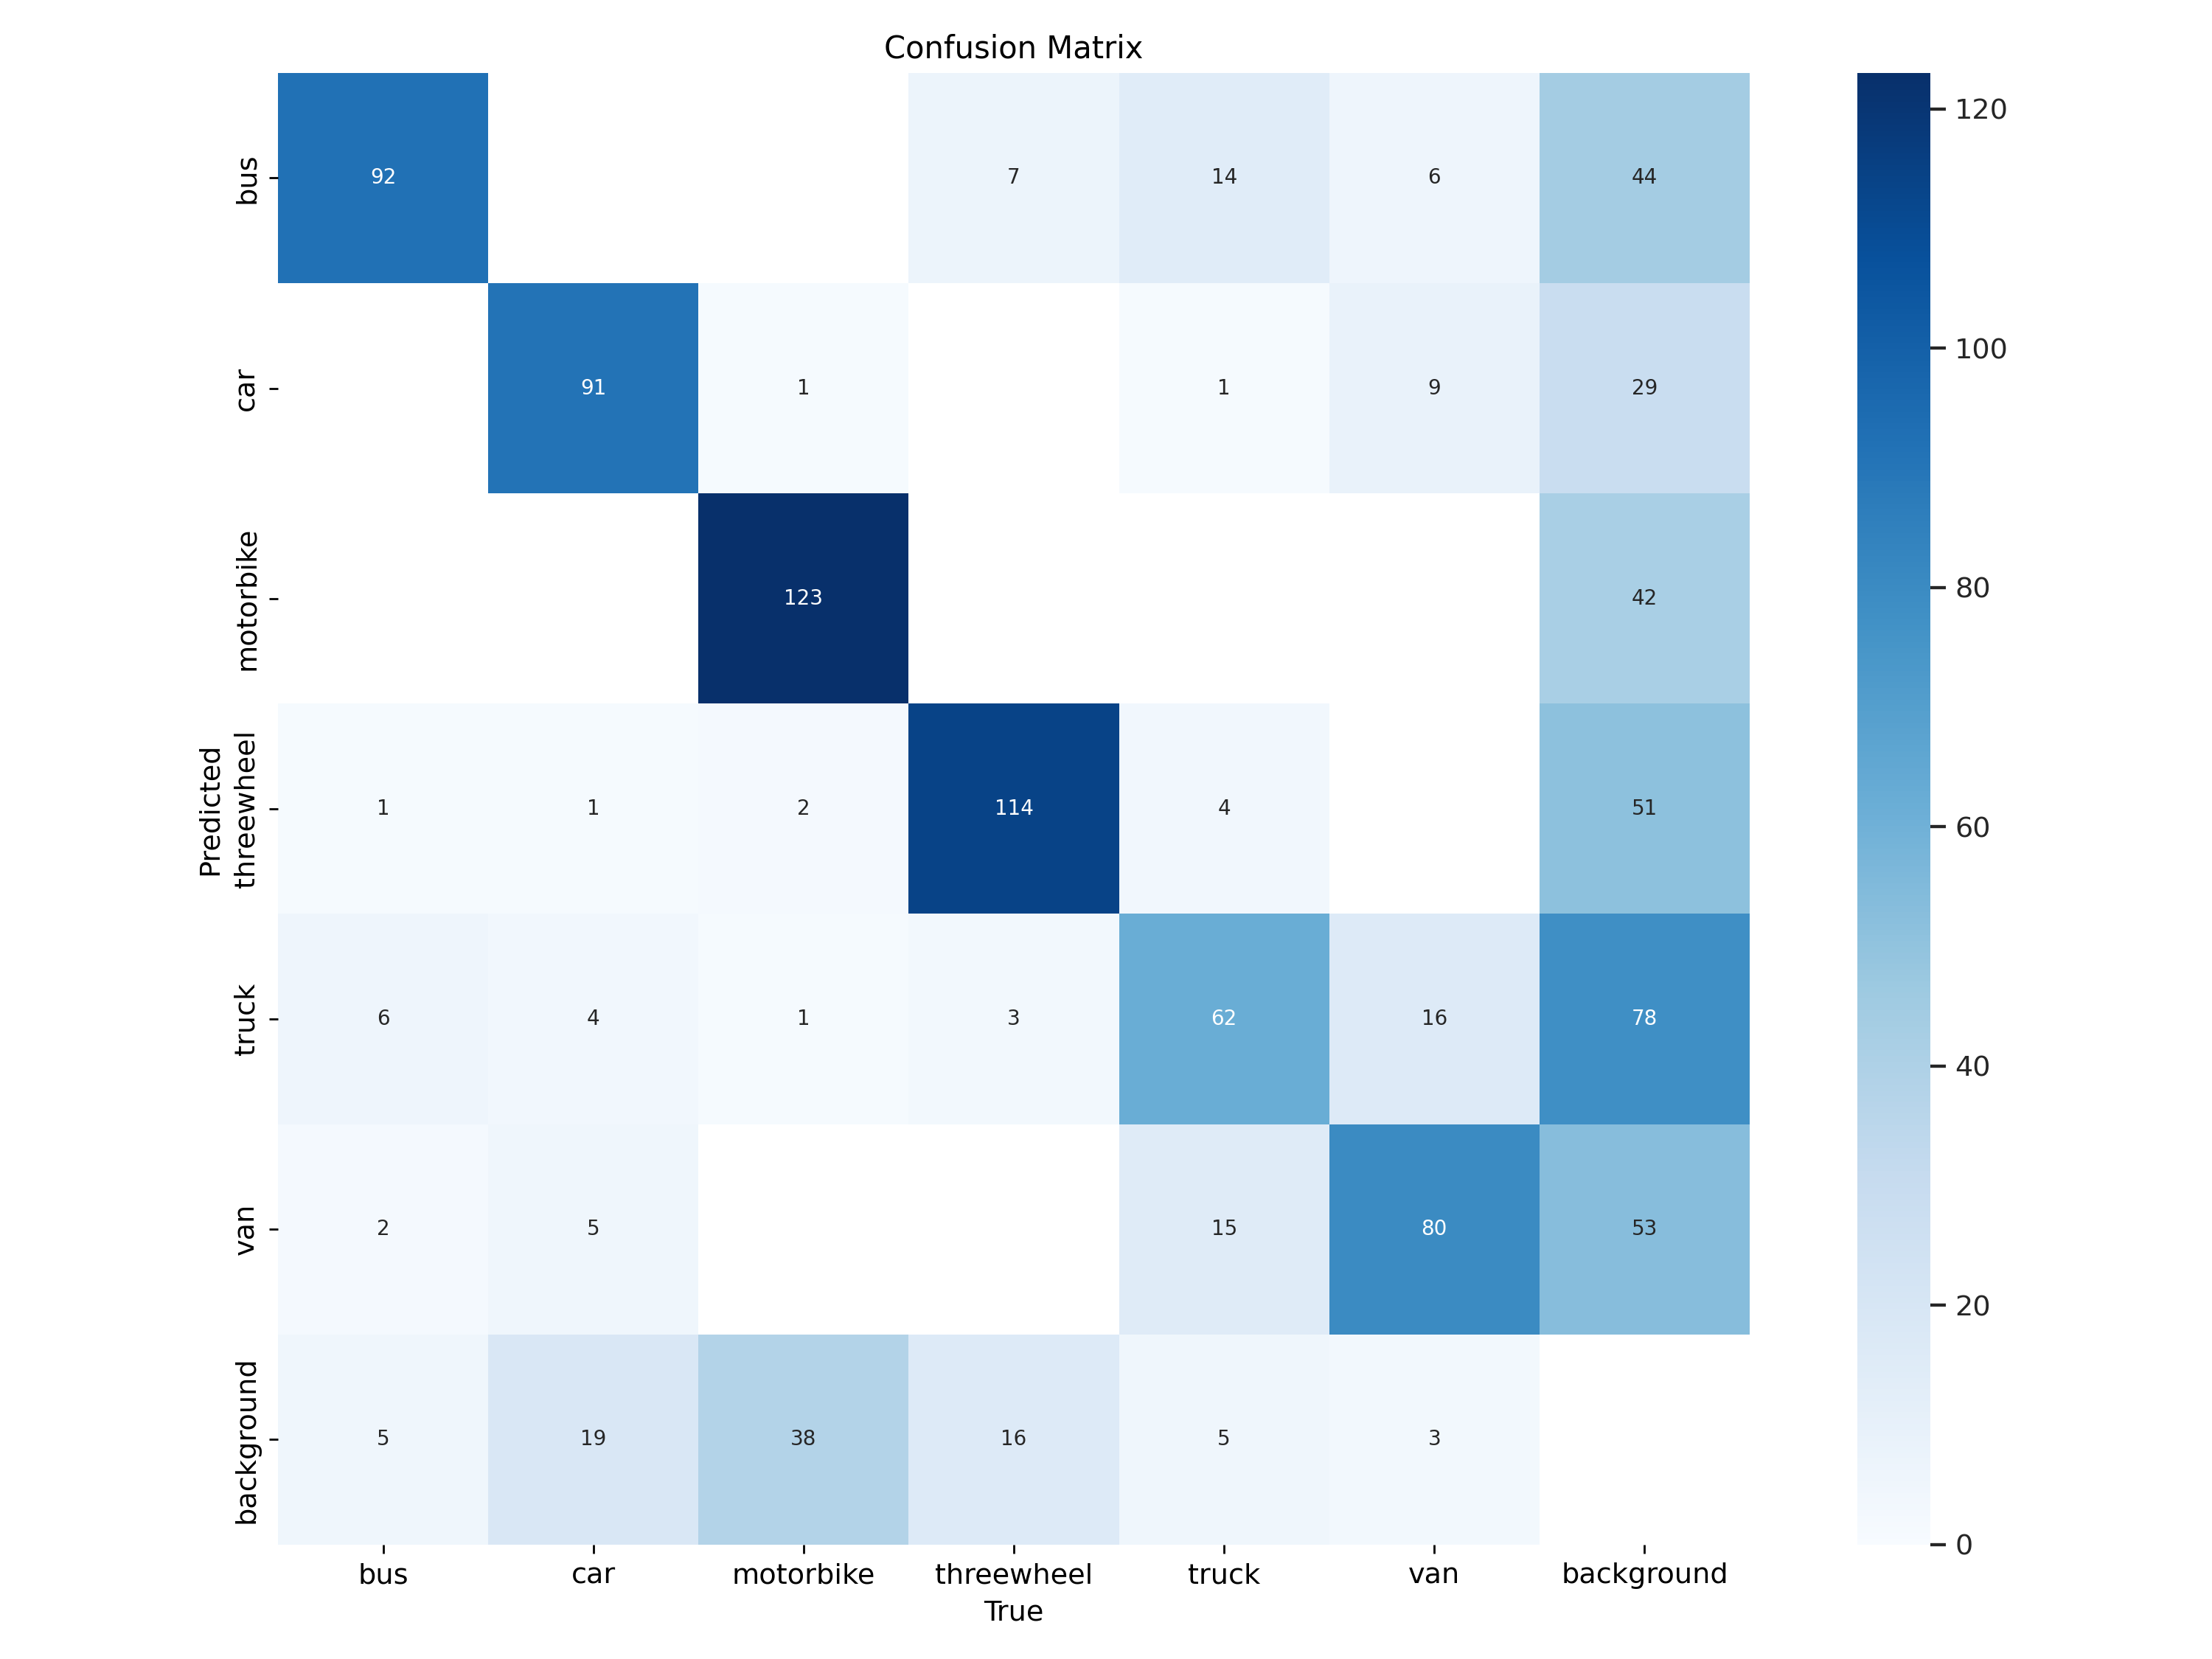

In [22]:
#Ma trận nhầm lẫn
from IPython.display import Image
Image(filename=f'runs/detect/train2/confusion_matrix.png', width=600)

In [23]:
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['bus', 'car', 'motorbike', 'threewheel', 'truck', 'van']

In [25]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train2/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [26]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.607415534090756
mAP 50 0.7521669251691399
mAP 75 0.6704358106640941


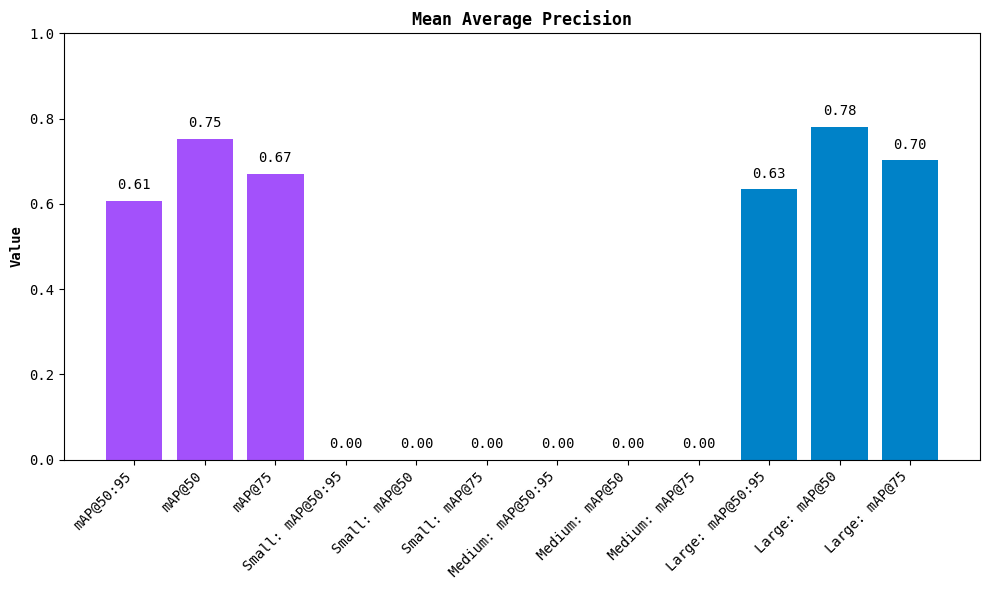

In [27]:
map.plot()

#Suy luận bằng mô hình đã được finetune

In [29]:
model = YOLO(f'/{HOME}/runs/detect/train2/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 640x640 7 motorbikes, 22.3ms
Speed: 2.1ms preprocess, 22.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


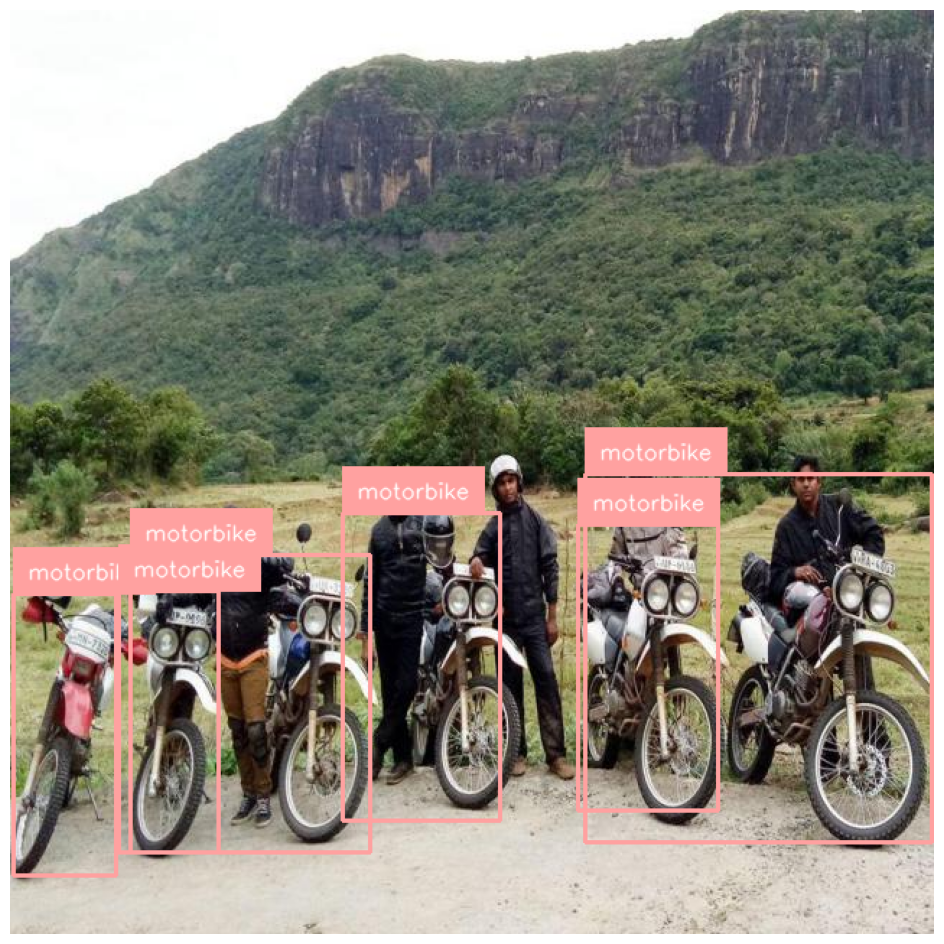

In [31]:
#Chạy thử mô hình đã huấn luyện, chọn ảnh ngẫu nhiên từ tập valid
import random

model = YOLO(f"/{HOME}/runs/detect/train2/weights/best.pt")

ds = sv.DetectionDataset.from_yolo(
	images_directory_path=f"{dataset.location}/valid/images",
	annotations_directory_path=f"{dataset.location}/valid/labels",
	data_yaml_path=f"{dataset.location}/data.yaml"
)

image = random.choice(list(ds.images.keys()))
image = cv2.imread(image)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.



0: 640x640 1 truck, 35.3ms
Speed: 2.0ms preprocess, 35.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


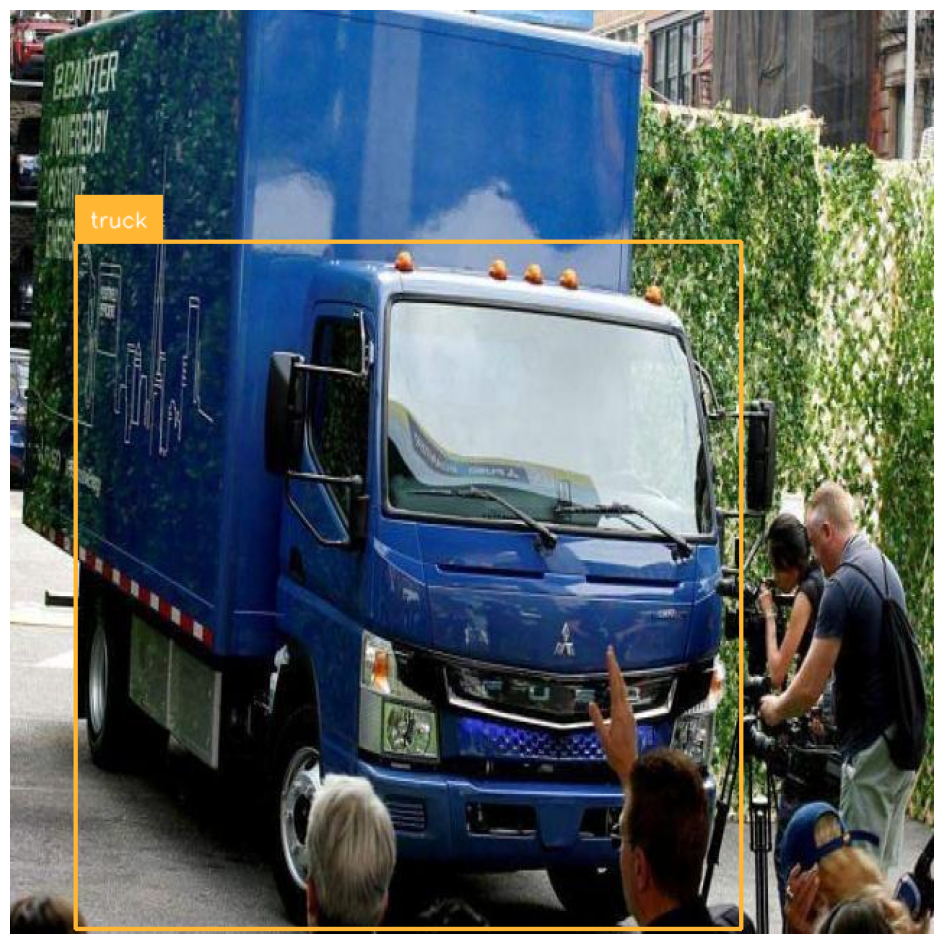

In [35]:
#Lặp lại
import random

model = YOLO(f"/{HOME}/runs/detect/train2/weights/best.pt")

ds = sv.DetectionDataset.from_yolo(
	images_directory_path=f"{dataset.location}/valid/images",
	annotations_directory_path=f"{dataset.location}/valid/labels",
	data_yaml_path=f"{dataset.location}/data.yaml"
)

image = random.choice(list(ds.images.keys()))
image = cv2.imread(image)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

results = model(image)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

#Lưu mô hình

In [18]:
#tải mô hình về máy
from google.colab import files

directory_to_download = '/content/runs/detect/train2'

!zip -r /content/train2.zip {directory_to_download}
files.download('/content/train2.zip')

updating: content/runs/detect/train2/ (stored 0%)
updating: content/runs/detect/train2/train_batch5162.jpg (deflated 6%)
updating: content/runs/detect/train2/train_batch5160.jpg (deflated 3%)
updating: content/runs/detect/train2/confusion_matrix.png (deflated 25%)
updating: content/runs/detect/train2/val_batch2_labels.jpg (deflated 5%)
updating: content/runs/detect/train2/args.yaml (deflated 53%)
updating: content/runs/detect/train2/results.png (deflated 8%)
updating: content/runs/detect/train2/F1_curve.png (deflated 6%)
updating: content/runs/detect/train2/val_batch2_pred.jpg (deflated 5%)
updating: content/runs/detect/train2/val_batch0_pred.jpg (deflated 8%)
updating: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 21%)
updating: content/runs/detect/train2/train_batch2.jpg (deflated 3%)
updating: content/runs/detect/train2/val_batch1_labels.jpg (deflated 6%)
updating: content/runs/detect/train2/weights/ (stored 0%)
updating: content/runs/detect/train2/weights/bes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>